In [1]:
#Introduction & Objectif
"""
Le but de ce projet est de tester la transférabilité de la méthodologie sur un dataset similaire mais distinct.
"""

In [9]:
# Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#3. Chargement des données
df = pd.read_csv("C:\\Users\\Admin\\winequality-white.csv", sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
#4. Compréhension du dataset
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


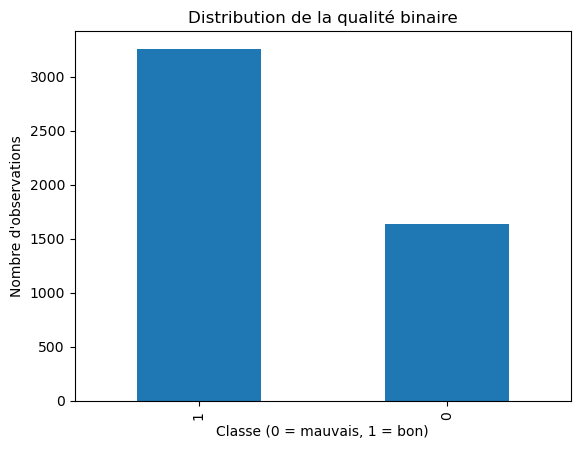

In [13]:
#Regroupement des classes
df['quality_binary'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)
df[['quality', 'quality_binary']].head(10)
df['quality_binary'].value_counts()

df['quality_binary'].value_counts().plot(kind='bar')
plt.title("Distribution de la qualité binaire")
plt.xlabel("Classe (0 = mauvais, 1 = bon)")
plt.ylabel("Nombre d'observations")
plt.show()

In [14]:
#Séparation des données
from sklearn.model_selection import train_test_split

X = df.drop(['quality', 'quality_binary'], axis=1)
y = df['quality_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Entraînement du modèles binaire
from sklearn.linear_model import LogisticRegression

#Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_bin = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42
)
rf_bin.fit(X_train, y_train)

#Évaluation
from sklearn.metrics import classification_report, roc_auc_score

y_pred = rf_bin.predict(X_test)
y_proba = rf_bin.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.76      0.67      0.71       328
           1       0.84      0.89      0.87       652

    accuracy                           0.82       980
   macro avg       0.80      0.78      0.79       980
weighted avg       0.81      0.82      0.81       980

ROC AUC: 0.8795638186443213


In [ ]:
Performance globale vin blanc
Accuracy : 0.82
ROC-AUC : 0.88
Precision : 0.84
Recall : 0.89
Le modèle identifie très bien les bons vins
Le modèle identifie correctement ~84 % des vins à rejeter

Performance globale vin rouge
Accuracy : 0.80
ROC-AUC : 0.889
Precision : 0.79
Recall : 0.79
Le modèle identifie correctement ~79 % des vins à rejeter

Malgré des distributions différentes, le modèle conserve des performances élevées, 
ce qui démontre la transférabilité et la robustesse de la méthodologie.

CONCLUSION
Ce projet démontre la capacité à construire un pipeline de classification robuste et transférable.
Après une première application sur les vins rouges, la méthodologie a été répliquée avec succès sur les vins blancs, 
confirmant la stabilité des performances et la généralisation du modèle sur des jeux de données similaires.